In [1]:
# Goal is to identifying the person's bodyfat percentage

In [2]:
# List of color palettes
# palettes = {
#     'Deep': sns.color_palette('deep'),
#     'Muted': sns.color_palette('muted'),
#     'Pastel': sns.color_palette('pastel'),
#     'Dark': sns.color_palette('dark'),
#     'Colorblind': sns.color_palette('colorblind'),
#     'Set1': sns.color_palette('Set1'),
#     'Set2': sns.color_palette('Set2'),
#     'Set3': sns.color_palette('Set3'),
#     'Paired': sns.color_palette('Paired'),
#     'Husl': sns.color_palette('husl'),
#     'Hls': sns.color_palette('hls'),
#     'Cubehelix': sns.color_palette('cubehelix'),
#     'Spectral': sns.color_palette('Spectral'),
#     'Coolwarm': sns.color_palette('coolwarm'),
#     'RdBu': sns.color_palette('RdBu')
# } 

In [3]:
# (body composition means what your body is made of—mainly fat and muscle)
# DENSITY: higher density -> lower body fat / understanding body composition density is calculated not predicted
# BODYFAT: % of person's weight - measure of body fatness  DEPENDENT VARIABLE
# NECK/CHEST/ABDOMEN/HIP/THIGH/KNEE/ANKLE/BICEPS/FOREARM/WRIST -> circumference in cm - to estimate bodyfat %
# ABDOMEN ->measues level of belly button
# Biceps > measured when arm is flexed
# Forearm > measured when arm is relaxed

In [4]:
# good morning, today i got project on predicting bodyfat percentage using machine learning models.

In [5]:
import pandas as pd # preprocessing
import numpy as np  # 
import warnings
warnings.filterwarnings('ignore')

In [6]:
fat = pd.read_csv("bodyfat.csv")
fat

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [7]:
fat.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [8]:
fat.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [9]:
fat.tail(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
242,1.0304,30.4,66,234.25,72.00,41.4,119.7,109.0,109.1,63.7,42.4,24.6,35.6,30.7,19.5
243,1.0256,32.6,67,227.75,72.75,41.3,115.8,113.4,109.8,65.6,46.0,25.4,35.3,29.8,19.5
244,1.0334,29.0,67,199.50,68.50,40.7,118.3,106.1,101.6,58.2,38.8,24.1,32.1,29.3,18.5
245,1.0641,15.2,68,155.50,69.25,36.3,97.4,84.3,94.4,54.3,37.5,22.6,29.2,27.3,18.5
246,1.0308,30.2,69,215.50,70.50,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [10]:
fat.sample(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
174,1.0414,25.3,36,226.75,71.75,41.5,115.3,108.8,114.4,69.2,42.4,24.0,35.4,21.0,20.1
207,1.0254,32.8,47,195.00,72.50,40.2,102.7,101.3,101.7,60.7,39.4,23.3,36.7,31.6,18.4
121,1.0414,25.3,44,185.25,71.50,39.5,99.2,98.1,101.4,57.1,40.5,23.2,33.0,29.6,18.4
238,1.0705,12.4,64,155.25,69.50,37.9,95.8,82.8,94.5,61.2,39.1,22.3,29.8,28.9,18.3
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
87,1.0462,23.1,64,160.00,65.75,36.5,104.3,90.9,93.8,57.8,39.5,23.3,29.2,28.4,18.1
232,1.0636,15.4,58,175.50,71.50,38.0,100.2,88.1,97.8,57.1,38.9,23.6,30.9,29.6,18.0
125,1.0587,17.5,46,167.00,67.00,36.6,101.0,89.9,100.0,60.7,36.0,21.9,35.6,30.2,17.6
211,1.0373,27.2,49,216.25,74.50,40.2,115.6,104.0,109.0,63.7,40.3,23.2,36.8,31.0,18.9


In [11]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [12]:
fat.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [13]:
fat['Weight'].unique()

array([154.25, 173.25, 154.  , 184.75, 184.25, 210.25, 181.  , 176.  ,
       191.  , 198.25, 186.25, 216.  , 180.5 , 205.25, 187.75, 162.75,
       195.75, 209.25, 183.75, 211.75, 179.  , 200.5 , 140.25, 148.75,
       151.25, 159.25, 131.5 , 148.  , 133.25, 160.75, 182.  , 160.25,
       168.  , 218.5 , 247.25, 191.75, 202.25, 196.75, 363.15, 203.  ,
       262.75, 205.  , 217.  , 212.  , 125.25, 164.25, 133.5 , 148.5 ,
       135.75, 127.5 , 158.25, 139.25, 137.25, 152.75, 136.25, 198.  ,
       181.5 , 201.25, 202.5 , 179.75, 178.75, 193.25, 178.  , 205.5 ,
       183.5 , 151.5 , 154.75, 155.25, 156.75, 167.5 , 146.75, 125.  ,
       143.  , 148.25, 162.5 , 177.75, 161.25, 171.25, 163.75, 150.25,
       190.25, 170.75, 167.  , 157.75, 160.  , 176.75, 177.  , 165.25,
       192.5 , 224.5 , 188.75, 156.5 , 197.  , 198.5 , 173.75, 172.75,
       165.5 , 200.25, 203.25, 194.  , 168.5 , 183.25, 178.25, 163.  ,
       175.25, 158.  , 177.25, 187.5 , 206.5 , 185.25, 161.  , 177.5 ,
      

In [14]:
fat[['BodyFat','Age']].value_counts()

BodyFat  Age
3.7      27     2
32.9     44     2
24.4     41     2
0.0      40     1
22.5     38     1
               ..
15.6     31     1
15.9     42     1
16.0     28     1
         47     1
47.5     51     1
Name: count, Length: 249, dtype: int64

In [15]:
# average BodyFat for people aged between 30 and 50:
avg = fat[(fat['Age'] >= 30) & (fat['Age'] <= 50)]
avgBodyFat = avg['BodyFat'].mean()    # to choose particular column and fing mean of it
print(f"Average BodyFat for ages 30 to 50: {avgBodyFat}")

Average BodyFat for ages 30 to 50: 19.352857142857143


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# COMPARING THE AVERAGE BODYFAT ACROSS DIFFERENT AGE GROUPS

In [18]:
fat['Age'].unique()

array([23, 22, 26, 24, 25, 27, 32, 30, 35, 34, 28, 33, 31, 29, 41, 49, 40,
       50, 46, 45, 44, 48, 39, 43, 47, 51, 42, 54, 58, 62, 61, 56, 57, 55,
       69, 81, 66, 67, 64, 70, 72, 53, 38, 52, 36, 37, 60, 63, 65, 68, 74],
      dtype=int64)

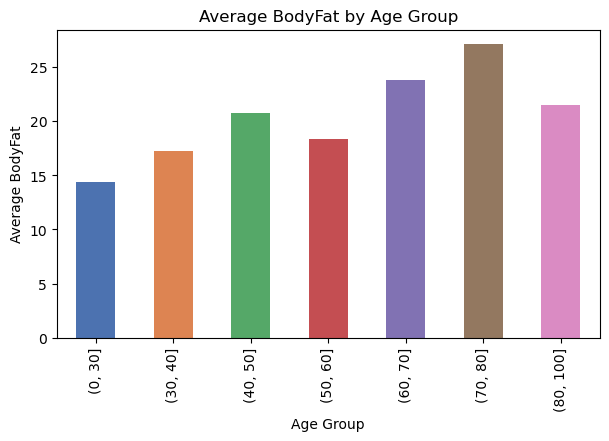

In [19]:
fat['AgeGroup'] = pd.cut(fat['Age'], bins = [0, 30, 40, 50, 60, 70, 80, 100]) # labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
# 'AgeGroup' created to categorize individuals into age ranges or bins
# pd.cut -> used to convert continuous variables into categorical variables
avg = fat.groupby('AgeGroup')['BodyFat'].mean()

# plot
plt.figure(figsize=(7,4))
avg.plot(kind = 'bar', color=sns.color_palette('deep'))
plt.title('Average BodyFat by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average BodyFat')
plt.show()

In [20]:
# DISTRIBUTION OF BODYFAT

In [21]:
fat['BodyFat'].unique()

array([12.3,  6.1, 25.3, 10.4, 28.7, 20.9, 19.2, 12.4,  4.1, 11.7,  7.1,
        7.8, 20.8, 21.2, 22.1, 29. , 22.9, 16. , 16.5, 19.1, 15.2, 15.6,
       17.7, 14. ,  3.7,  7.9,  8.8, 11.9,  5.7, 11.8, 21.3, 32.3, 40.1,
       24.2, 28.4, 35.2, 32.6, 34.5, 32.9, 31.6, 32. ,  7.7, 13.9, 10.8,
        5.6, 13.6,  4. , 10.2,  6.6,  8. ,  6.3,  3.9, 22.6, 20.4, 28. ,
       31.5, 24.6, 26.1, 29.8, 30.7, 25.8, 30. , 21.5, 13.8, 12.9, 24.3,
        8.5, 13.5, 18.5, 22.2, 18.8, 31.4, 26.8, 18.4, 27. , 26.6, 14.9,
       23.1,  8.3, 14.1, 20.5, 18.2, 24.9,  9. , 17.4,  9.6, 11.3, 17.8,
       20.1, 22.3, 25.4, 18. , 19.3, 18.3, 17.3, 21.4, 19.7, 26.7, 16.7,
       18.1, 27.9, 14.7, 17.5, 27.2, 22.7, 23.6, 24.4, 27.1, 21.8, 29.4,
       22.4, 23.3,  9.4, 10.3, 14.2, 29.6,  5.3, 25.2, 19.6, 10.1, 21. ,
       31.2, 10. , 12.5, 22.5, 14.6, 13. , 15.1, 27.3, 20.3, 34.3,  3. ,
        0.7, 16.9,  9.9, 13.1, 29.9,  0. , 11.5, 12.1,  8.6, 11.4, 38.1,
       15.9, 24.7, 22.8, 25.5, 22. , 12.2,  6. , 34

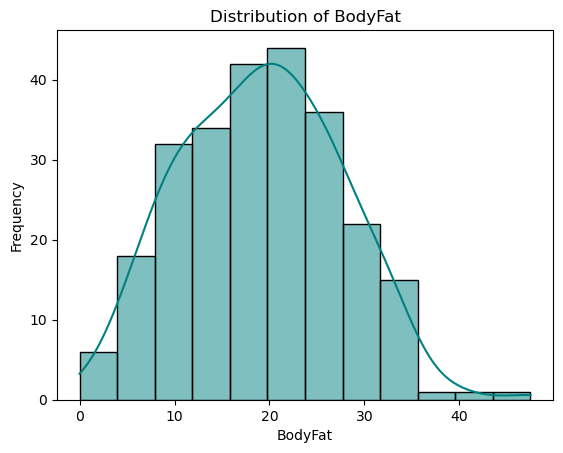

In [22]:
# using histogram with KDE
hist_data = fat['BodyFat']
sns.histplot(hist_data, color='teal', kde=True) # Kernel Density Estimate (KDE) - to provide a clearer and more detailed view of the data distribution
plt.title('Distribution of BodyFat')
plt.xlabel('BodyFat')
plt.ylabel('Frequency')
plt.show()

In [23]:
# DISTRIBUTION OF WEIGHT

In [24]:
# using histogram with BOXPLOT
# plt.figure(figsize=(7,5))
# sns.boxplot(x=fat['Weight'], color='Mediumorchid')
# plt.title('Distributuion of Weight uising Box Plot')
# plt.xlabel('Weight')
# plt.ylabel('Frequency')
# plt.show()

In [25]:
# DISTRIBUTION OF HEIGHT

In [26]:
# using histogram with VIOLINPLOT
# plt.figure(figsize=(7,5))
# sns.violinplot(x=fat['Height'], color='yellow')
# plt.title('Violin Plot of Height')
# plt.xlabel('Height')
# plt.ylabel('Frequency')
# plt.show()

In [27]:
# DISTRIBUTION OF AGE GROUPS

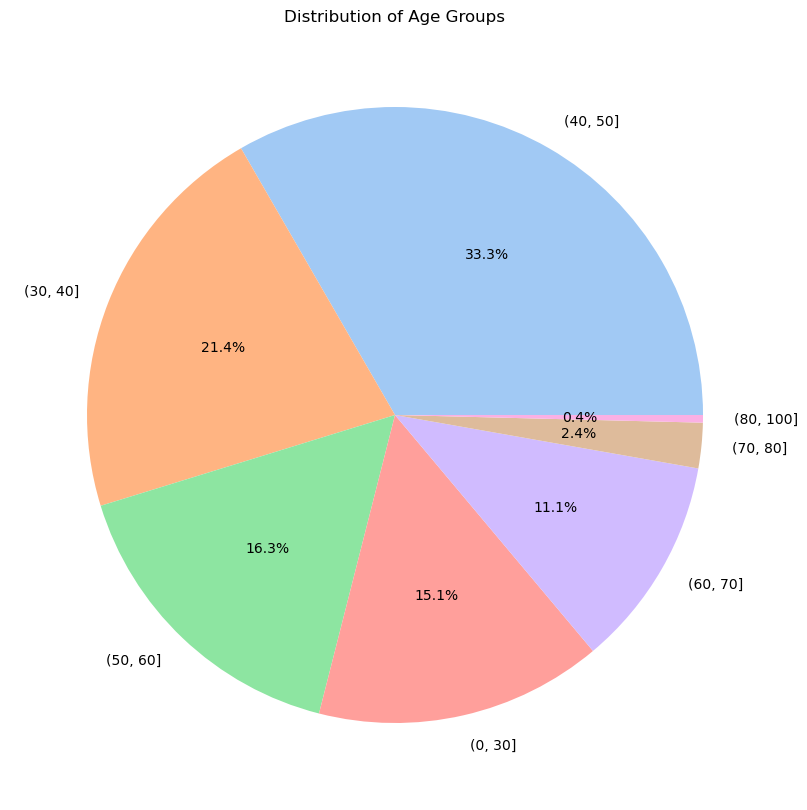

In [28]:
# Calculate the count of each AgeGroup
ageGroup_counts = fat['AgeGroup'].value_counts()
plt.figure(figsize=(12,10))
plt.pie(ageGroup_counts, labels=ageGroup_counts.index, autopct = '%1.1f%%', colors = sns.color_palette('pastel'))
plt.title('Distribution of Age Groups')
plt.show()

In [29]:
# DENSITY OF BODY FAT ACROSS AGEGROUP

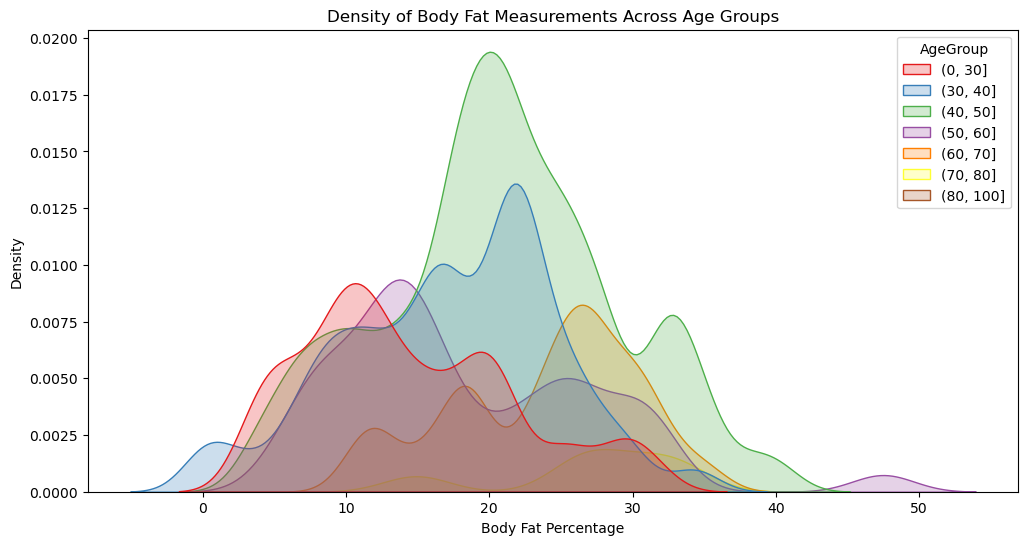

In [30]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=fat, x='BodyFat', hue='AgeGroup', fill=True, palette='Set1', bw_adjust=0.5)

# Add titles and labels
plt.title('Density of Body Fat Measurements Across Age Groups')
plt.xlabel('Body Fat Percentage')
plt.ylabel('Density')

# Show the plot
plt.show()

In [31]:
# DISTRIBUTION OF BODYFAT BY AGE GROUP

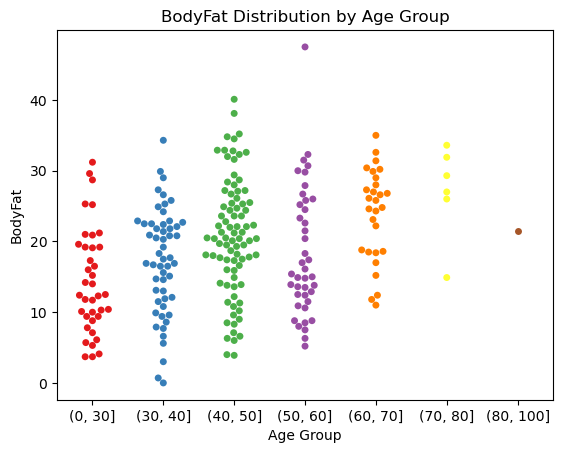

In [32]:
sns.swarmplot(x='AgeGroup', y='BodyFat', data=fat, palette='Set1')
plt.title('BodyFat Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('BodyFat')
plt.show()

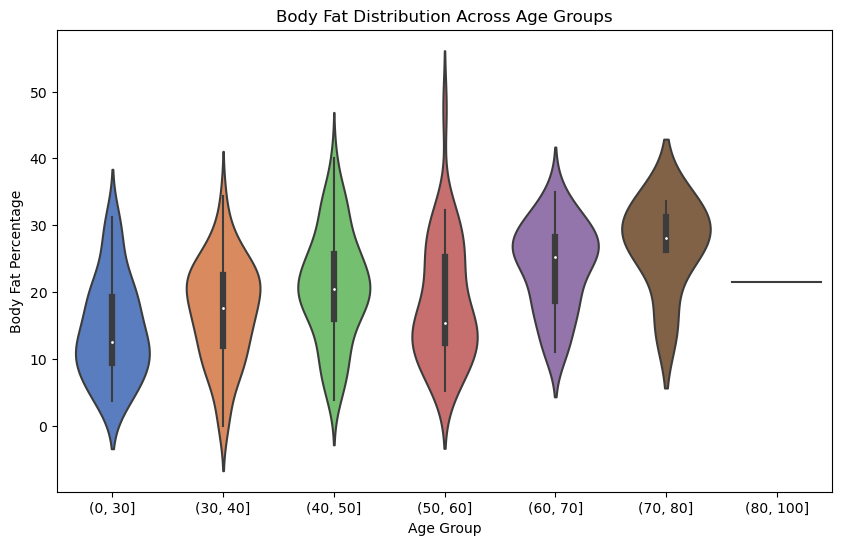

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='AgeGroup', y='BodyFat', data=fat, palette='muted')

# Add titles and labels
plt.title('Body Fat Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Body Fat Percentage')

# Show the plot
plt.show()

In [34]:
#  BODYFAT VS AGE

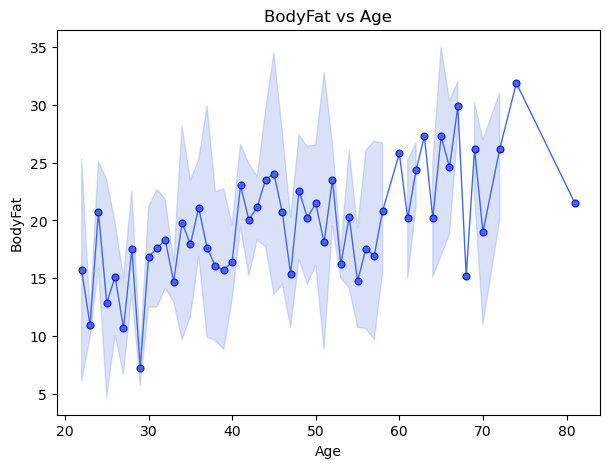

In [35]:
Age = fat['Age']
BodyFat = fat['BodyFat']
plt.figure(figsize = (7,5))
sns.lineplot(x=Age, y=BodyFat, linewidth=1, color='Royalblue', marker='.', markeredgecolor='blue', linestyle='-', markersize=10)
plt.title('BodyFat vs Age')
plt.xlabel('Age')
plt.ylabel('BodyFat')
plt.show()

In [36]:
# RELATIONSHIP BETWEEN AGE WEIGHT AND BODYFAT PERCENTAGE

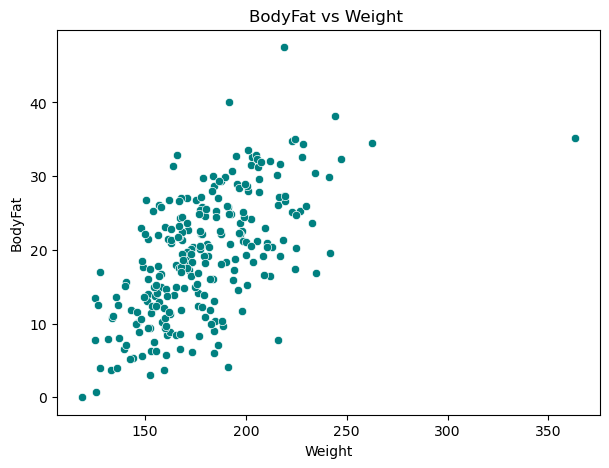

In [37]:
x_scatter = fat['Weight']
y_scatter = fat['BodyFat']
plt.figure(figsize =(7,5))
sns.scatterplot(x=x_scatter, y=y_scatter, color = 'Teal')
plt.title('BodyFat vs Weight ')
plt.xlabel('Weight')
plt.ylabel('BodyFat')
plt.show()

In [38]:
# RELATIONSHIP BETWEEN BODY FAT PERCENTAGE AND HEIGHT

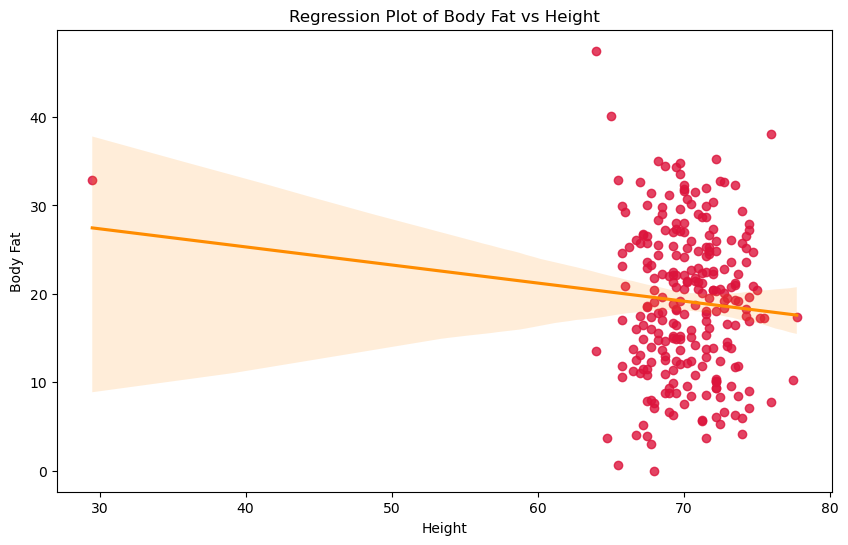

In [39]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Height', y='BodyFat', data=fat, scatter_kws={'color':'Crimson'}, line_kws={'color':'darkorange'})
plt.title('Regression Plot of Body Fat vs Height')
plt.xlabel('Height')
plt.ylabel('Body Fat')
plt.show()

In [40]:
# plt.figure(figsize=(10, 6))
# sns.lmplot(x='Height', y='BodyFat', data=fat, scatter_kws={'color':'Crimson'}, line_kws={'color':'darkorange'})
# plt.title('Regression Plot of Body Fat vs Height')
# plt.xlabel('Height')
# plt.ylabel('Body Fat')
# plt.show()

In [41]:
# PAIRWISE RELATIONSHIPS AMONG MULTIPLE VARIABLES

In [42]:
# plot_columns = ['Age', 'BodyFat', 'Weight', 'Height']
# sns.pairplot(fat[plot_columns], diag_kind='kde', hue='BodyFat', palette='viridis')
# plt.suptitle('Pair Plot of Age, BodyFat, Weight and Height', y=1.02)
# plt.show()

In [43]:
# DISTRIBUTION OF BODY FAT BY DIFFERENT AGE GROUPS USING FACET GRID WITH KDE

In [44]:
# g = sns.FacetGrid(fat, col='AgeGroup', col_wrap=3, height=4)
# g.map(sns.kdeplot, 'BodyFat', fill= True, color='black')
# g.set_axis_labels('Body Fat', 'Density')
# g.set_titles('Age Group: {col_name}')
# plt.subplots_adjust(top=.9)
# g.fig.suptitle('Density of Body Fat across Age Groups')
# plt.show()

In [45]:
# correlation matrix

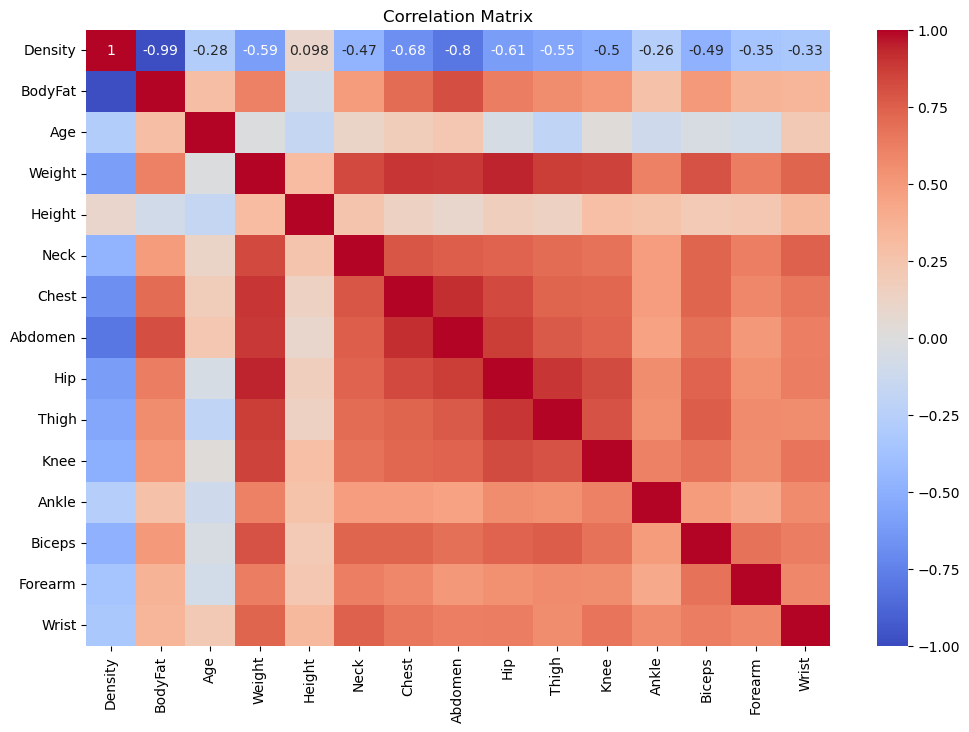

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_fat = fat.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_fat.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [47]:
# Choose features that have a strong correlation with the target variable, BodyFat. The closer the absolute value of the correlation to 1, the stronger the linear relationship.
# Try to avoid features that are highly correlated with each other, as this could lead to multicollinearity, making your model less stable.

In [48]:
# Weight
# Neck
# Chest
# Hip
# Thigh
# Knee
# Ankle
# Biceps
# Wrist
# Abdomen

In [49]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Density   252 non-null    float64 
 1   BodyFat   252 non-null    float64 
 2   Age       252 non-null    int64   
 3   Weight    252 non-null    float64 
 4   Height    252 non-null    float64 
 5   Neck      252 non-null    float64 
 6   Chest     252 non-null    float64 
 7   Abdomen   252 non-null    float64 
 8   Hip       252 non-null    float64 
 9   Thigh     252 non-null    float64 
 10  Knee      252 non-null    float64 
 11  Ankle     252 non-null    float64 
 12  Biceps    252 non-null    float64 
 13  Forearm   252 non-null    float64 
 14  Wrist     252 non-null    float64 
 15  AgeGroup  252 non-null    category
dtypes: category(1), float64(14), int64(1)
memory usage: 30.6 KB


In [50]:
fat.drop(['Density'], inplace=True, axis=1)

In [51]:
fat.drop(['Age','Height','Ankle','AgeGroup'], inplace=True, axis=1)

In [52]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Weight   252 non-null    float64
 2   Neck     252 non-null    float64
 3   Chest    252 non-null    float64
 4   Abdomen  252 non-null    float64
 5   Hip      252 non-null    float64
 6   Thigh    252 non-null    float64
 7   Knee     252 non-null    float64
 8   Biceps   252 non-null    float64
 9   Forearm  252 non-null    float64
 10  Wrist    252 non-null    float64
dtypes: float64(11)
memory usage: 21.8 KB


In [53]:
# independent
X = fat.drop(['BodyFat'],axis=1)

In [54]:
y = fat['BodyFat']

In [55]:
X

,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Biceps,Forearm,Wrist
0,154.25,36.2,93.1,85.2,94.5,59.0,37.3,32.0,27.4,17.1
1,173.25,38.5,93.6,83.0,98.7,58.7,37.3,30.5,28.9,18.2
2,154.00,34.0,95.8,87.9,99.2,59.6,38.9,28.8,25.2,16.6
3,184.75,37.4,101.8,86.4,101.2,60.1,37.3,32.4,29.4,18.2
4,184.25,34.4,97.3,100.0,101.9,63.2,42.2,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...
247,134.25,34.9,89.2,83.6,88.8,49.6,34.8,25.6,25.7,18.5
248,201.00,40.9,108.5,105.0,104.5,59.6,40.8,35.2,28.6,20.1
249,186.75,38.9,111.1,111.5,101.7,60.3,37.3,31.3,27.2,18.0
250,190.75,38.9,108.3,101.3,97.8,56.0,41.6,30.5,29.4,19.8


In [56]:
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

In [57]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Weight   252 non-null    float64
 2   Neck     252 non-null    float64
 3   Chest    252 non-null    float64
 4   Abdomen  252 non-null    float64
 5   Hip      252 non-null    float64
 6   Thigh    252 non-null    float64
 7   Knee     252 non-null    float64
 8   Biceps   252 non-null    float64
 9   Forearm  252 non-null    float64
 10  Wrist    252 non-null    float64
dtypes: float64(11)
memory usage: 21.8 KB


In [58]:
y.value_counts()

BodyFat
20.4    4
25.8    3
23.6    3
14.9    3
16.5    3
       ..
31.4    1
18.8    1
18.5    1
13.5    1
31.9    1
Name: count, Length: 176, dtype: int64

In [59]:
# SKEWNESS means how data is spread out - whether balanced / leaned more to only one side(right or left))
# positive -> more on left
# negative -> more on right - logarithm transformation
# zero -> perfectly balanced

In [60]:
# calculating skewness
skewness = fat['BodyFat'].skew()
print(f"Skewness of BodyFat: {skewness}")
# as it is slightly poitive but close to 0, it is symmetrical not heavily skewed

Skewness of BodyFat: 0.14635310763344916


In [61]:
# OUTLIER DETECTION AND REMOVAL
# Q1 = fat['BodyFat'].quantile(0.25)
# Q3 = fat['BodyFat'].quantile(0.75)
# IQR = Q3 - Q1

# Remove outliers based on IQR
# df_no_outliers = fat[~((fat['BodyFat'] < (Q1 - 1.5 * IQR)) | (fat['BodyFat'] > (Q3 + 1.5 * IQR)))]

In [62]:
from sklearn.model_selection import train_test_split
X = fat.drop(['BodyFat'],axis=1)
y = fat['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [63]:
# DECISION TREE REGRESSION

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [65]:
# initializing
model_tree = DecisionTreeRegressor()

In [66]:
# model training
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
# make prediction on test set
y_pred = model_tree.predict(X_test)

In [69]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse_tree = np.sqrt(mse)
print(f"RMSE: {rmse_tree:.2f}")

RMSE: 6.13


In [ ]:
# SUPPORT VECTOR REGRESSION [SVR]

In [70]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [71]:
model_svr = SVR()

In [72]:
model_svr.fit(X_train, y_train)

SVR()

In [73]:
y_pred = model_svr.predict(X_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse)
print(f"RMSE: {rmse_svr:.2f}")

RMSE: 5.63


In [75]:
# RANDOM FOREST REGRESSION

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [77]:
model_rf = RandomForestRegressor()

In [78]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
y_pred = model_rf.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse)
print(f" RMSE: {rmse_rf:.2f}")

 RMSE: 4.57


In [81]:
# Decision Tree Regressor: RMSE = 6.05
# Support Vector Regressor (SVR): RMSE = 6.95
# Random Forest Regressor: RMSE = 4.67

# Lower RMSE indicates best model performance, so Random Forest Regressor performs best on dataset
# Higher RMSE indicates more error in predictions, so Support Vector Regressor performs worse compared to the other models - overfitting

In [82]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Weight   252 non-null    float64
 2   Neck     252 non-null    float64
 3   Chest    252 non-null    float64
 4   Abdomen  252 non-null    float64
 5   Hip      252 non-null    float64
 6   Thigh    252 non-null    float64
 7   Knee     252 non-null    float64
 8   Biceps   252 non-null    float64
 9   Forearm  252 non-null    float64
 10  Wrist    252 non-null    float64
dtypes: float64(11)
memory usage: 21.8 KB


In [86]:
# output
def predict_bodyfat():
    # collect user input
    Weight = float(input("Enter weight (eg.,153.25, 224.50) :")) 
    Neck = float(input("Enter neck (in centimeter eg., 35.2, 40.8) :"))  
    Chest = float(input("Enter chest (in centimeter eg., 89.6, 119.6) :"))  
    Abdomen = float(input("Enter abdomen (in centimeter eg., 79.7, 118.0) :"))  
    Hip = float(input("Enter hip (in centimeter eg., 91.9, 114.3) :"))  
    Thigh = float(input("Enter thigh (in centimeter eg., 55.0, 66.5) :"))  
    Knee = float(input("Enter knee (in centimeter eg., 35.2, 42.5) :"))    
    Biceps = float(input("Enter biceps (in centimeter eg., 29.4, 37.7) :"))
    Forearm = float(input("Enter Forearm (in centimeter eg., 21.2, 31.6) :"))
    Wrist = float(input("Enter wrist (in centimeter eg 17.0, 19.4) :"))

    # input directly in the form of expected model
    inputs = [
        Weight,
        Neck,
        Chest,
        Abdomen,
        Hip,
        Thigh,
        Knee,
        Biceps,
        Forearm,
        Wrist
    ]
    
    # make prediction using preprocessed input data
    predicted_bodyfat = model_rf.predict([inputs])[0]
    
    # return the result
    return f"Predicted Body Fat: {predicted_bodyfat:.2f}%"

In [87]:
# calling the function
result = predict_bodyfat()

# printing result
print("Prediction :", result)

Enter weight (eg.,153.25, 224.50) : 153.25
Enter neck (in centimeter eg., 35.2, 40.8) : 35.2
Enter chest (in centimeter eg., 89.6, 119.6) : 89.6
Enter abdomen (in centimeter eg., 79.7, 118.0) : 79.7
Enter hip (in centimeter eg., 91.9, 114.3) : 91.9
Enter thigh (in centimeter eg., 55.0, 66.5) : 55.0
Enter knee (in centimeter eg., 35.2, 42.5) : 35.2
Enter biceps (in centimeter eg., 29.4, 37.7) : 29.4
Enter Forearm (in centimeter eg., 21.2, 31.6) : 21.2
Enter wrist (in centimeter eg 17.0, 19.4) : 17.0


Prediction : Predicted Body Fat: 9.59%


In [89]:
import pickle

In [90]:
with open('rfc_bodyfat.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

In [ ]:
# For men, a body fat percentage between 14-24% is generally considered average,
# while for women, the average range is higher, around 21-31%.

In [ ]:
# Higher than Average Body Fat Percentage:
# If the body fat percentage is higher than the average range, it could indicate that the person has more fat tissue relative to lean mass. 

In [ ]:
# Lower than Average Body Fat Percentage:
# If the body fat percentage is lower than the average range, it could indicate a higher proportion of lean mass (muscle, bone, water, etc.) relative to fat.